In [1]:
%pip install pandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 9)


Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv('/home/guido/gitprojects/datascience/aufg_12/edlich-kmeans-A0.csv')
X=data
X.shape
X

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


In [3]:
fig=plt.figure()

<Figure size 1152x648 with 0 Axes>

In [4]:
ax=Axes3D(fig)

In [5]:
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2])

In [6]:
# Wir legen K fest
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)

C = kmeans.cluster_centers_

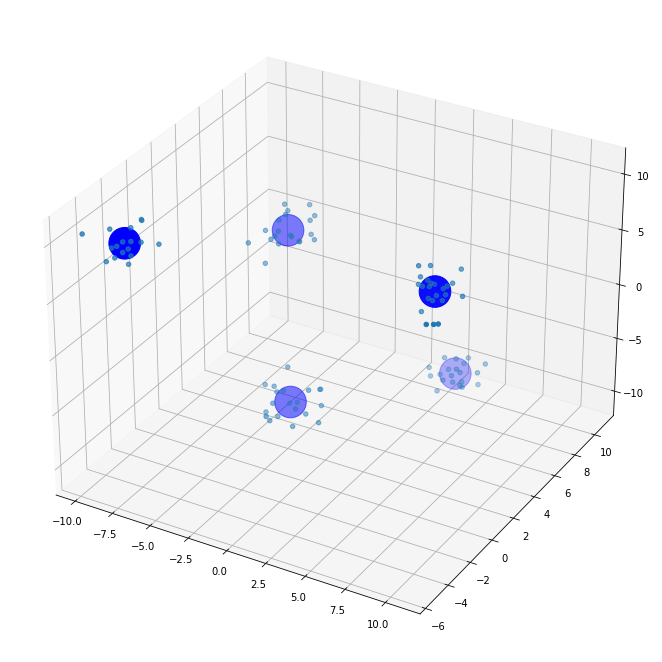

In [7]:
fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2],marker='o', c='b', s=1000)
plt.show()

In [8]:
# A) Es gibt 5 klar ersichtliche Cluster, K=5
labels = kmeans.predict(X)
print(labels)

[0 3 3 2 3 4 2 3 1 2 3 1 2 4 0 3 1 4 0 0 3 1 0 3 3 2 1 1 1 4 1 1 4 4 3 0 4
 0 1 3 4 4 4 0 4 3 2 2 4 2 2 4 1 1 2 2 0 2 3 4 2 0 2 2 4 2 0 0 0 4 4 2 1 2
 2 1 3 4 2 1 1 4 3 0 0 3 0 0 0 2 1 1 1 3 2 2 1 4 0 0]


In [9]:
# B) in welchem Cluster sind die Punkte
X["Cluster"] = labels
X


,V1,V2,V3,Cluster
0,-5.340236,4.747246,3.823326,0
1,-9.587065,-3.434466,9.701839,3
2,-8.385012,-3.902794,8.514620,3
3,5.708226,2.658575,5.404482,2
4,-7.431665,-4.390251,9.003216,3
...,...,...,...,...
95,5.240474,2.983800,5.104915,2
96,-1.675543,3.780111,-8.060940,1
97,2.979751,10.772783,-10.093143,4
98,-5.154519,5.976515,2.794622,0


In [10]:
kdf = pd.DataFrame({"k": range(1,16)})

In [11]:
kdf["kmeans"] = kdf.apply( lambda row: KMeans(n_clusters=row["k"], random_state=0).fit(X.values), axis=1)

In [12]:
kdf["inertia"] = kdf.apply( lambda row: row["kmeans"].inertia_, axis=1)

In [13]:
print(kdf)

     k                                 kmeans       inertia
0    1   KMeans(n_clusters=1, random_state=0)  10457.616785
1    2   KMeans(n_clusters=2, random_state=0)   5077.813291
2    3   KMeans(n_clusters=3, random_state=0)   2582.212581
3    4   KMeans(n_clusters=4, random_state=0)   1368.182057
4    5   KMeans(n_clusters=5, random_state=0)    441.623289
5    6   KMeans(n_clusters=6, random_state=0)    213.750353
6    7   KMeans(n_clusters=7, random_state=0)    193.702737
7    8                 KMeans(random_state=0)    177.374531
8    9   KMeans(n_clusters=9, random_state=0)    166.003247
9   10  KMeans(n_clusters=10, random_state=0)    149.486942
10  11  KMeans(n_clusters=11, random_state=0)    141.944448
11  12  KMeans(n_clusters=12, random_state=0)    129.951855
12  13  KMeans(n_clusters=13, random_state=0)    123.091796
13  14  KMeans(n_clusters=14, random_state=0)    112.994484
14  15  KMeans(n_clusters=15, random_state=0)    108.651377


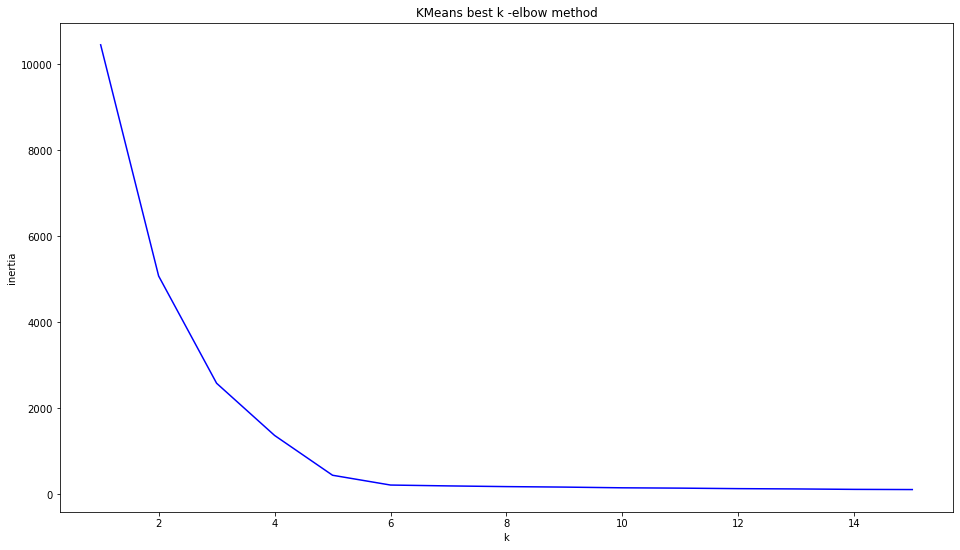

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('KMeans best k -elbow method')
ax.set_xlabel('k')
ax.set_ylabel('inertia')

ax.plot(kdf["k"], kdf["inertia"], 'b')
plt.show()
# die Kurve k -elbow belegt K=5